In [2]:
import pandas as pd

In [5]:



# Creating the occupancy DataFrame
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December'],
    'Occupancy Rate': [70, 75, 80, 85, 90, 95, 70, 75, 80, 85, 90, 95]  # Occupancy rates for each month
}

occupancy_df = pd.DataFrame(data)
occupancy_df.set_index('Month', inplace=True)
occupancy_df

,Occupancy Rate
Month,
January,70
February,75
March,80
April,85
May,90
June,95
July,70
August,75
September,80


In [14]:
import pandas as pd

def calculate_best_price(occupancy_rate, min_price, max_price):
    """
    Calculate the best nightly price based on occupancy rate, min price, and max price constraints.
    
    :param occupancy_rate: float - The occupancy rate for the month as a percentage (0-100).
    :param min_price: float - The minimum price for the month in dollars.
    :param max_price: float - The maximum price for the month in dollars.
    
    :return: float - The best nightly price in dollars.
    """
    adjusted_min_price = min_price * 1.3
    adjusted_max_price = max_price * 0.8
    best_price = adjusted_min_price + (adjusted_max_price - adjusted_min_price) * (occupancy_rate / 100)
    return best_price

def calculate_payoff_time(initial_investment, occupancy_df):
    """
    Calculate the number of months needed to pay off the initial investment.
    
    :param initial_investment: float - The initial investment amount in dollars.
    :param occupancy_df: pandas DataFrame - DataFrame with months as index and occupancy rates, min price, max price as columns.
    
    :return: int - Number of months needed to pay off the investment.
    """
    total_income = 0
    months = 0

    while total_income < initial_investment:
        for month, row in occupancy_df.iterrows():
            occupancy_rate = row['Occupancy Rate']
            min_price = row['Min Price']
            max_price = row['Max Price']
            best_price = calculate_best_price(occupancy_rate, min_price, max_price)
            monthly_income = best_price * 30 * (occupancy_rate / 100)
            total_income += monthly_income
            months += 1
            if total_income >= initial_investment:
                break
    
    return months

# Example usage:
initial_investment = 60_000  # Initial investment in dollars



In [15]:
# Creating the occupancy DataFrame
data = {
    'month': ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December'],
    'Occupancy Rate': [70, 75, 80, 85, 90, 95, 70, 75, 80, 85, 90, 95],  # Occupancy rates for each month
    'Min Price': [50, 55, 60, 65, 70, 75, 50, 55, 60, 65, 70, 75],  # Minimum price for each month
    'Max Price': [150, 155, 160, 165, 170, 175, 150, 155, 160, 165, 170, 175]  # Maximum price for each month
}

occupancy_df = pd.DataFrame(data)
occupancy_df

,month,Occupancy Rate,Min Price,Max Price
0,January,70,50,150
1,February,75,55,155
2,March,80,60,160
3,April,85,65,165
4,May,90,70,170
5,June,95,75,175
6,July,70,50,150
7,August,75,55,155
8,September,80,60,160
9,October,85,65,165


In [16]:

months_to_payoff = calculate_payoff_time(initial_investment, occupancy_df)
print(f"It will take {months_to_payoff} months to pay off the initial investment.")


It will take 21 months to pay off the initial investment.


In [19]:
import pandas as pd

def calculate_best_price(occupancy_rate, min_price, max_price):
    """
    Calculate the best nightly price based on occupancy rate, min price, and max price constraints.
    
    :param occupancy_rate: float - The occupancy rate for the month as a percentage (0-100).
    :param min_price: float - The minimum price for the month in dollars.
    :param max_price: float - The maximum price for the month in dollars.
    
    :return: float - The best nightly price in dollars.
    """
    adjusted_min_price = min_price * 1.3
    adjusted_max_price = max_price * 0.8
    best_price = adjusted_min_price + (adjusted_max_price - adjusted_min_price) * (occupancy_rate / 100)
    return best_price

def calculate_payoff_time(initial_investment, occupancy_df, airbnb_fee_pct, cleaning_fee_pct, tax_fee, mortgage_fee):
    """
    Calculate the number of months needed to pay off the initial investment.
    
    :param initial_investment: float - The initial investment amount in dollars.
    :param occupancy_df: pandas DataFrame - DataFrame with months as index and occupancy rates, min price, max price as columns.
    :param airbnb_fee_pct: float - The Airbnb fee as a percentage of the monthly income.
    :param cleaning_fee_pct: float - The cleaning fee as a percentage of the monthly income.
    :param tax_fee: float - The monthly tax fee from the government in dollars.
    :param mortgage_fee: float - The constant monthly mortgage fee in dollars.
    
    :return: int - Number of months needed to pay off the investment.
    """
    total_income = 0
    months = 0

    while total_income < initial_investment:
        for month, row in occupancy_df.iterrows():
            occupancy_rate = row['Occupancy Rate']
            min_price = row['Min Price']
            max_price = row['Max Price']
            best_price = calculate_best_price(occupancy_rate, min_price, max_price)
            monthly_income = best_price * 30 * (occupancy_rate / 100)
            airbnb_fee = monthly_income * (airbnb_fee_pct / 100)
            cleaning_fee = monthly_income * (cleaning_fee_pct / 100)
            net_income = monthly_income - (airbnb_fee + cleaning_fee + tax_fee + mortgage_fee)
            total_income += max(net_income, 0)  # Ensure we don't subtract if net income is negative
            months += 1
            if total_income >= initial_investment:
                break
    
    return months

# Example usage:
initial_investment = 60_000  # Initial investment in dollars
airbnb_fee_pct = 20          # Airbnb fee as a percentage of the monthly income
cleaning_fee_pct = 10        # Cleaning fee as a percentage of the monthly income
tax_fee = 150               # Monthly tax fee in dollars
mortgage_fee = 1_000          # Monthly mortgage fee in dollars

# Creating the occupancy DataFrame
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December'],
    'Occupancy Rate': [70, 75, 80, 85, 90, 95, 70, 75, 80, 85, 90, 95],  # Occupancy rates for each month
    'Min Price': [50, 55, 60, 65, 70, 75, 50, 55, 60, 65, 70, 75],  # Minimum price for each month
    'Max Price': [150, 155, 160, 165, 170, 175, 150, 155, 160, 165, 170, 175]  # Maximum price for each month
}

occupancy_df = pd.DataFrame(data)
occupancy_df.set_index('Month', inplace=True)

months_to_payoff = calculate_payoff_time(initial_investment, occupancy_df, airbnb_fee_pct, cleaning_fee_pct, tax_fee, mortgage_fee)
print(f"It will take {months_to_payoff} months to pay off the initial investment.")


It will take 64 months to pay off the initial investment.


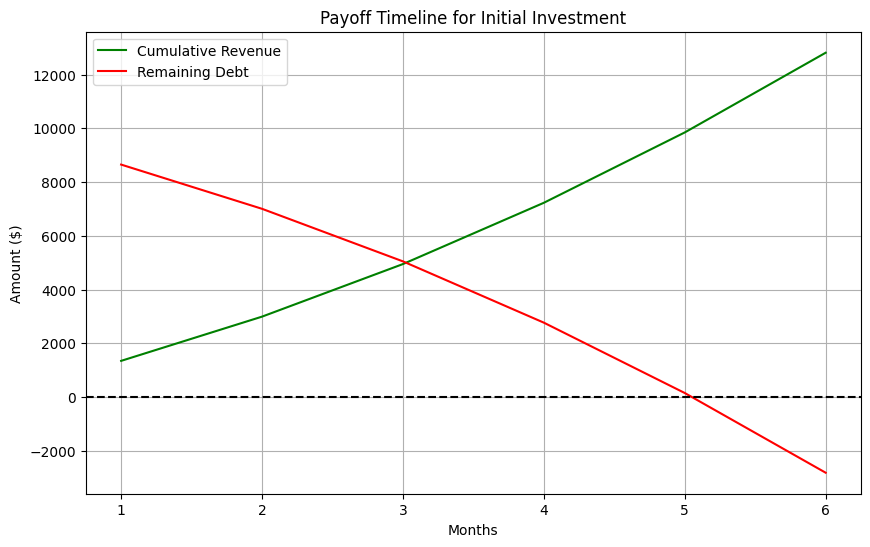

It will take 6 months to pay off the initial investment.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_best_price(occupancy_rate, min_price, max_price):
    """
    Calculate the best nightly price based on occupancy rate, min price, and max price constraints.
    
    :param occupancy_rate: float - The occupancy rate for the month as a percentage (0-100).
    :param min_price: float - The minimum price for the month in dollars.
    :param max_price: float - The maximum price for the month in dollars.
    
    :return: float - The best nightly price in dollars.
    """
    adjusted_min_price = min_price * 1.3
    adjusted_max_price = max_price * 0.8
    best_price = adjusted_min_price + (adjusted_max_price - adjusted_min_price) * (occupancy_rate / 100)
    return best_price

def calculate_payoff_time_with_visualization(initial_investment, occupancy_df, airbnb_fee_pct, cleaning_fee_pct, tax_fee, mortgage_fee):
    """
    Calculate the number of months needed to pay off the initial investment and visualize the payoff process.
    
    :param initial_investment: float - The initial investment amount in dollars.
    :param occupancy_df: pandas DataFrame - DataFrame with months as index and occupancy rates, min price, max price as columns.
    :param airbnb_fee_pct: float - The Airbnb fee as a percentage of the monthly income.
    :param cleaning_fee_pct: float - The cleaning fee as a percentage of the monthly income.
    :param tax_fee: float - The monthly tax fee from the government in dollars.
    :param mortgage_fee: float - The constant monthly mortgage fee in dollars.
    
    :return: int - Number of months needed to pay off the investment.
    """
    total_income = 0
    months = 0
    debt_remaining = initial_investment
    revenue_list = []
    debt_list = []
    months_list = []

    while total_income < initial_investment:
        for month, row in occupancy_df.iterrows():
            occupancy_rate = row['Occupancy Rate']
            min_price = row['Min Price']
            max_price = row['Max Price']
            best_price = calculate_best_price(occupancy_rate, min_price, max_price)
            monthly_income = best_price * 30 * (occupancy_rate / 100)
            airbnb_fee = monthly_income * (airbnb_fee_pct / 100)
            cleaning_fee = monthly_income * (cleaning_fee_pct / 100)
            net_income = monthly_income - (airbnb_fee + cleaning_fee + tax_fee + mortgage_fee)
            total_income += max(net_income, 0)  # Ensure we don't subtract if net income is negative
            debt_remaining -= max(net_income, 0)
            months += 1
            
            revenue_list.append(total_income)
            debt_list.append(debt_remaining)
            months_list.append(months)
            
            if total_income >= initial_investment:
                break
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(months_list, revenue_list, label='Cumulative Revenue', color='green')
    plt.plot(months_list, debt_list, label='Remaining Debt', color='red')
    plt.axhline(0, color='black', linestyle='--')
    plt.xlabel('Months')
    plt.ylabel('Amount ($)')
    plt.title('Payoff Timeline for Initial Investment')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return months

# Example usage:
initial_investment = 10000  # Initial investment in dollars
airbnb_fee_pct = 5          # Airbnb fee as a percentage of the monthly income
cleaning_fee_pct = 3        # Cleaning fee as a percentage of the monthly income
tax_fee = 150               # Monthly tax fee in dollars
mortgage_fee = 500          # Monthly mortgage fee in dollars

# Creating the occupancy DataFrame
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December'],
    'Occupancy Rate': [70, 75, 80, 85, 90, 95, 70, 75, 80, 85, 90, 95],  # Occupancy rates for each month
    'Min Price': [50, 55, 60, 65, 70, 75, 50, 55, 60, 65, 70, 75],  # Minimum price for each month
    'Max Price': [150, 155, 160, 165, 170, 175, 150, 155, 160, 165, 170, 175]  # Maximum price for each month
}

occupancy_df = pd.DataFrame(data)
occupancy_df.set_index('Month', inplace=True)

months_to_payoff = calculate_payoff_time_with_visualization(initial_investment, occupancy_df, airbnb_fee_pct, cleaning_fee_pct, tax_fee, mortgage_fee)
print(f"It will take {months_to_payoff} months to pay off the initial investment.")


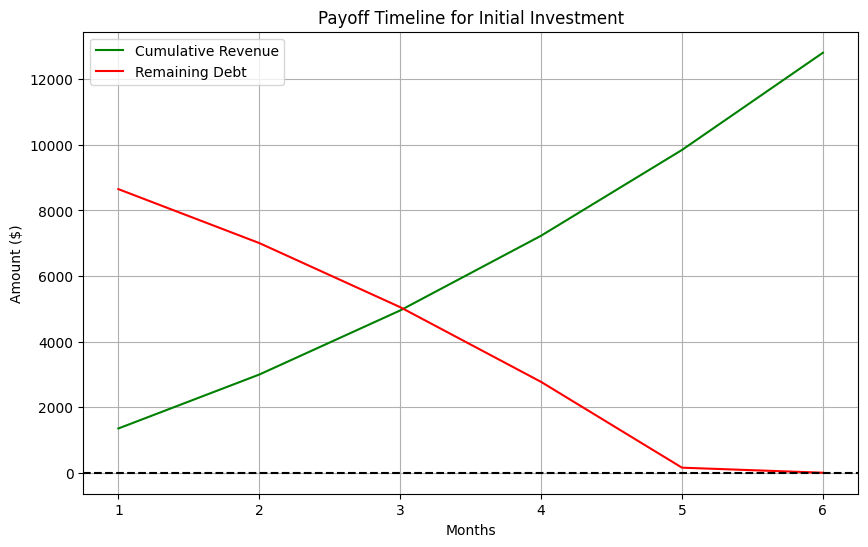

It will take 6 months to pay off the initial investment.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_best_price(occupancy_rate, min_price, max_price):
    """
    Calculate the best nightly price based on occupancy rate, min price, and max price constraints.
    
    :param occupancy_rate: float - The occupancy rate for the month as a percentage (0-100).
    :param min_price: float - The minimum price for the month in dollars.
    :param max_price: float - The maximum price for the month in dollars.
    
    :return: float - The best nightly price in dollars.
    """
    adjusted_min_price = min_price * 1.3
    adjusted_max_price = max_price * 0.8
    best_price = adjusted_min_price + (adjusted_max_price - adjusted_min_price) * (occupancy_rate / 100)
    return best_price

def calculate_payoff_time_with_visualization(initial_investment, occupancy_df, airbnb_fee_pct, cleaning_fee_pct, tax_fee, mortgage_fee):
    """
    Calculate the number of months needed to pay off the initial investment and visualize the payoff process.
    
    :param initial_investment: float - The initial investment amount in dollars.
    :param occupancy_df: pandas DataFrame - DataFrame with months as index and occupancy rates, min price, max price as columns.
    :param airbnb_fee_pct: float - The Airbnb fee as a percentage of the monthly income.
    :param cleaning_fee_pct: float - The cleaning fee as a percentage of the monthly income.
    :param tax_fee: float - The monthly tax fee from the government in dollars.
    :param mortgage_fee: float - The constant monthly mortgage fee in dollars.
    
    :return: int - Number of months needed to pay off the investment.
    """
    total_income = 0
    months = 0
    debt_remaining = initial_investment
    revenue_list = []
    debt_list = []
    months_list = []

    while debt_remaining > 0:
        for month, row in occupancy_df.iterrows():
            occupancy_rate = row['Occupancy Rate']
            min_price = row['Min Price']
            max_price = row['Max Price']
            best_price = calculate_best_price(occupancy_rate, min_price, max_price)
            monthly_income = best_price * 30 * (occupancy_rate / 100)
            airbnb_fee = monthly_income * (airbnb_fee_pct / 100)
            cleaning_fee = monthly_income * (cleaning_fee_pct / 100)
            net_income = monthly_income - (airbnb_fee + cleaning_fee + tax_fee + mortgage_fee)
            total_income += max(net_income, 0)  # Ensure we don't subtract if net income is negative
            debt_remaining -= max(net_income, 0)
            debt_remaining = max(debt_remaining, 0)  # Cap debt at 0
            months += 1
            
            revenue_list.append(total_income)
            debt_list.append(debt_remaining)
            months_list.append(months)
            
            if debt_remaining == 0:
                break
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(months_list, revenue_list, label='Cumulative Revenue', color='green')
    plt.plot(months_list, debt_list, label='Remaining Debt', color='red')
    plt.axhline(0, color='black', linestyle='--')
    plt.xlabel('Months')
    plt.ylabel('Amount ($)')
    plt.title('Payoff Timeline for Initial Investment')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return months

# Example usage:
initial_investment = 10000  # Initial investment in dollars
airbnb_fee_pct = 5          # Airbnb fee as a percentage of the monthly income
cleaning_fee_pct = 3        # Cleaning fee as a percentage of the monthly income
tax_fee = 150               # Monthly tax fee in dollars
mortgage_fee = 500          # Monthly mortgage fee in dollars

# Creating the occupancy DataFrame
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December'],
    'Occupancy Rate': [70, 75, 80, 85, 90, 95, 70, 75, 80, 85, 90, 95],  # Occupancy rates for each month
    'Min Price': [50, 55, 60, 65, 70, 75, 50, 55, 60, 65, 70, 75],  # Minimum price for each month
    'Max Price': [150, 155, 160, 165, 170, 175, 150, 155, 160, 165, 170, 175]  # Maximum price for each month
}

occupancy_df = pd.DataFrame(data)
occupancy_df.set_index('Month', inplace=True)

months_to_payoff = calculate_payoff_time_with_visualization(initial_investment, occupancy_df, airbnb_fee_pct, cleaning_fee_pct, tax_fee, mortgage_fee)
print(f"It will take {months_to_payoff} months to pay off the initial investment.")


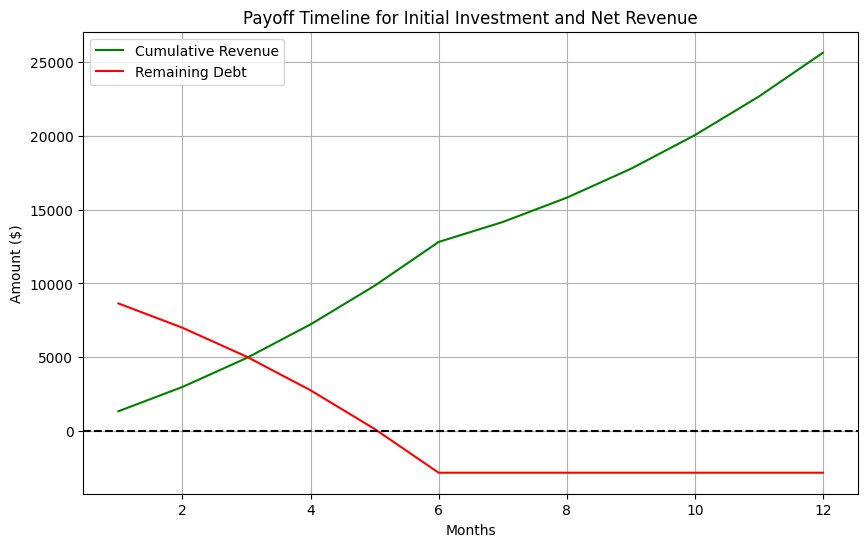

It will take 12 months to pay off the initial investment.


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_best_price(occupancy_rate, min_price, max_price):
    """
    Calculate the best nightly price based on occupancy rate, min price, and max price constraints.
    
    :param occupancy_rate: float - The occupancy rate for the month as a percentage (0-100).
    :param min_price: float - The minimum price for the month in dollars.
    :param max_price: float - The maximum price for the month in dollars.
    
    :return: float - The best nightly price in dollars.
    """
    adjusted_min_price = min_price * 1.3
    adjusted_max_price = max_price * 0.8
    best_price = adjusted_min_price + (adjusted_max_price - adjusted_min_price) * (occupancy_rate / 100)
    return best_price

def calculate_payoff_time_with_visualization(initial_investment, occupancy_df, airbnb_fee_pct, cleaning_fee_pct, tax_fee, mortgage_fee):
    """
    Calculate the number of months needed to pay off the initial investment and visualize the payoff process.
    
    :param initial_investment: float - The initial investment amount in dollars.
    :param occupancy_df: pandas DataFrame - DataFrame with months as index and occupancy rates, min price, max price as columns.
    :param airbnb_fee_pct: float - The Airbnb fee as a percentage of the monthly income.
    :param cleaning_fee_pct: float - The cleaning fee as a percentage of the monthly income.
    :param tax_fee: float - The monthly tax fee from the government in dollars.
    :param mortgage_fee: float - The constant monthly mortgage fee in dollars.
    
    :return: int - Number of months needed to pay off the investment.
    """
    total_income = 0
    net_revenue = 0
    months = 0
    debt_remaining = initial_investment
    revenue_list = []
    debt_list = []
    net_revenue_list = []
    months_list = []

    while debt_remaining > 0 or months == 0:
        for month, row in occupancy_df.iterrows():
            occupancy_rate = row['Occupancy Rate']
            min_price = row['Min Price']
            max_price = row['Max Price']
            best_price = calculate_best_price(occupancy_rate, min_price, max_price)
            monthly_income = best_price * 30 * (occupancy_rate / 100)
            airbnb_fee = monthly_income * (airbnb_fee_pct / 100)
            cleaning_fee = monthly_income * (cleaning_fee_pct / 100)
            net_income = monthly_income - (airbnb_fee + cleaning_fee + tax_fee + mortgage_fee)
            total_income += max(net_income, 0)  # Ensure we don't subtract if net income is negative
            
            if debt_remaining > 0:
                debt_remaining = debt_remaining  - max(net_income, 0)
                # debt_remaining = max(debt_remaining, 0)  # Cap debt at 0
            else:
                net_revenue = net_revenue  + max(net_income,0)
            
            months= months + 1
            
            revenue_list.append(total_income)
            debt_list.append(debt_remaining)
            net_revenue_list.append(net_revenue)
            months_list.append(months)
            
            if debt_remaining == 0 and net_revenue > 0:
                break
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(months_list, revenue_list, label='Cumulative Revenue', color='green')
    plt.plot(months_list, debt_list, label='Remaining Debt', color='red')
    # plt.plot(months_list,(revenue_list - debt_list) , label='Net Revenue', color='blue')
    plt.axhline(0, color='black', linestyle='--')
    plt.xlabel('Months')
    plt.ylabel('Amount ($)')
    plt.title('Payoff Timeline for Initial Investment and Net Revenue')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return months



In [34]:
revenue_list

NameError: name 'revenue_list' is not defined

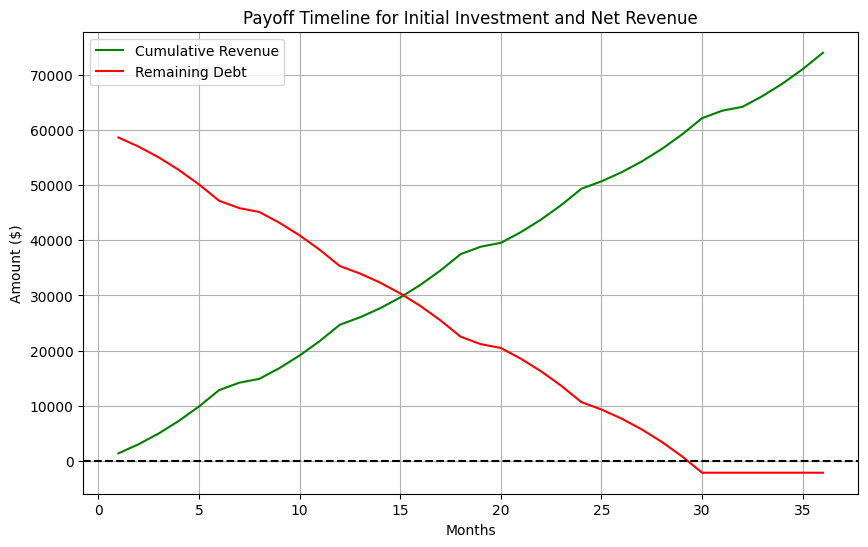

It will take 36 months to pay off the initial investment.


In [37]:
# Example usage:
initial_investment = 60_000  # Initial investment in dollars
airbnb_fee_pct = 5          # Airbnb fee as a percentage of the monthly income
cleaning_fee_pct = 3        # Cleaning fee as a percentage of the monthly income
tax_fee = 150               # Monthly tax fee in dollars
mortgage_fee = 500          # Monthly mortgage fee in dollars

# Creating the occupancy DataFrame
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December'],
    'Occupancy Rate': [70, 75, 80, 85, 90, 95, 70, 50, 80, 85, 90, 95],  # Occupancy rates for each month
    'Min Price': [50, 55, 60, 65, 70, 75, 50, 55, 60, 65, 70, 75],  # Minimum price for each month
    'Max Price': [150, 155, 160, 165, 170, 175, 150, 155, 160, 165, 170, 175]  # Maximum price for each month
}

occupancy_df = pd.DataFrame(data)
occupancy_df.set_index('Month', inplace=True)

months_to_payoff = calculate_payoff_time_with_visualization(initial_investment, occupancy_df, airbnb_fee_pct, cleaning_fee_pct, tax_fee, mortgage_fee)
print(f"It will take {months_to_payoff} months to pay off the initial investment.")
